In [5]:
!pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 36.1 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import io
import base64
from sklearn.preprocessing import RobustScaler
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve , confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import mysql.connector
from mysql.connector import errorcode
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [7]:
breast_data = pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')

In [8]:
breast_data = breast_data.drop('id', axis=1)

In [9]:
breast_data.diagnosis=[1 if each=="M" else 0 for each in breast_data.diagnosis]
y=breast_data.diagnosis.values
x_data=breast_data.drop(["diagnosis"],axis=1)

Image Variable: 

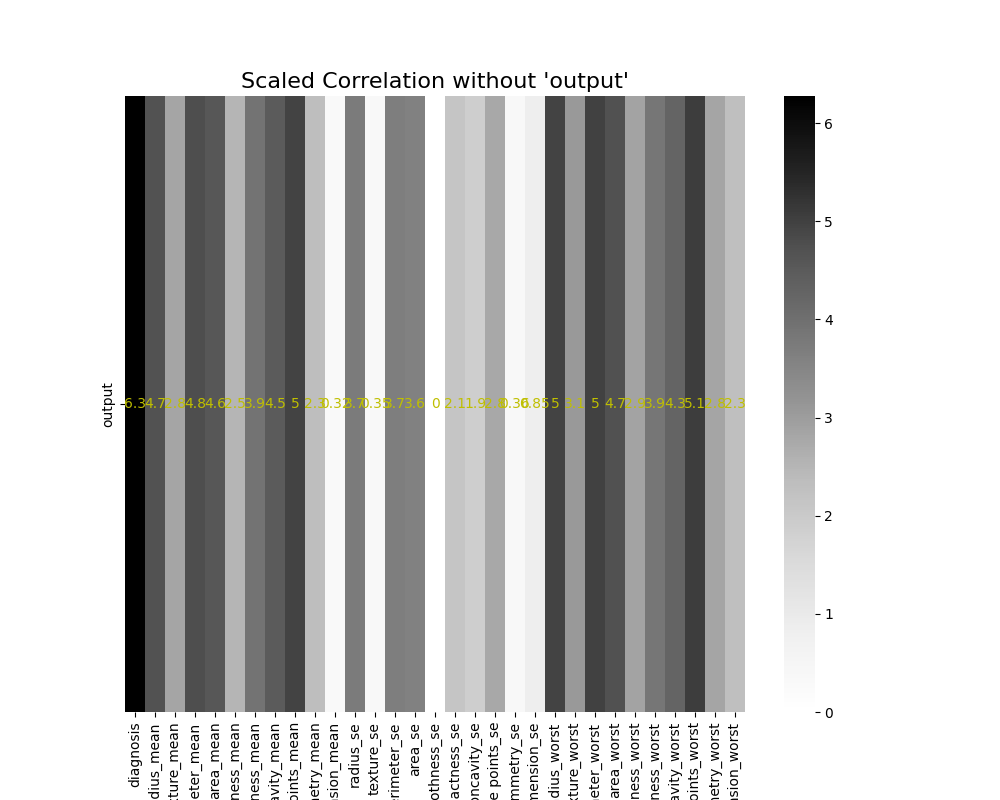

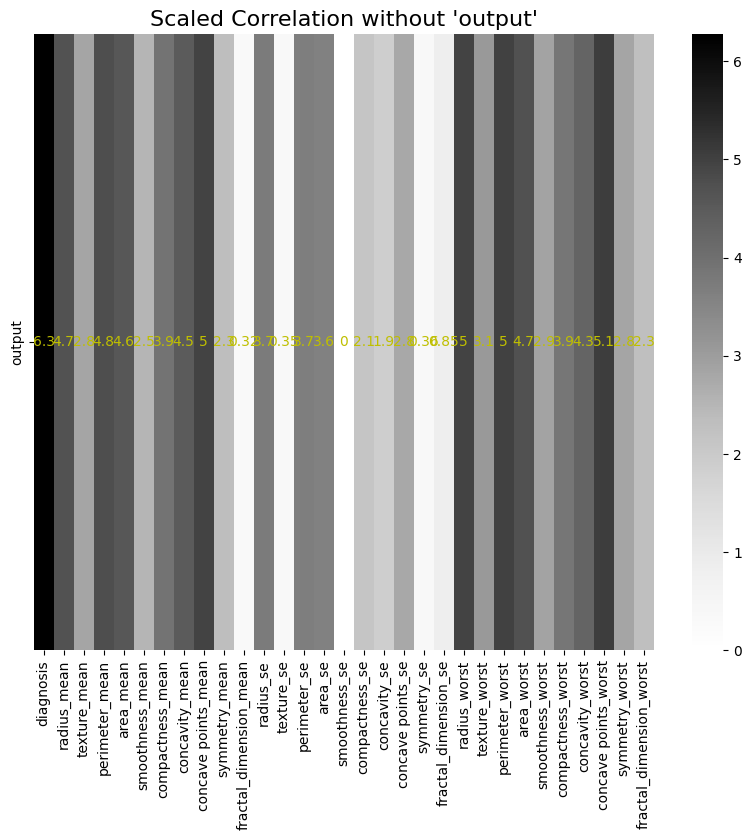

In [10]:
# 특성 열 선택
features = breast_data
out = y
# Min-Max 스케일링 적용
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(breast_data)
# 스케일링된 데이터로 DataFrame 생성
scaled_df = pd.DataFrame(scaled_data, columns=breast_data.columns)
scaled_df['output'] = out
# 상관관계 계산
correlation_matrix = scaled_df.corr()
# 'output' 열에 대한 상관관계 추출
output_correlation = correlation_matrix.drop('output')['output']
# 상관관계 값을 스케일링
scaled_output_correlation = (output_correlation - output_correlation.min()) / (output_correlation.max() - output_correlation.min())
# 합이 100이 되도록 조정
scaled_output_correlation = (scaled_output_correlation / scaled_output_correlation.sum()) * 100
# heatmap으로 상관관계 시각화
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data=scaled_output_correlation.to_frame().T, annot=True, annot_kws=dict(color='y', fontsize=10), cmap='Greys')
plt.title("Scaled Correlation without 'output'", fontsize=16)
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
# Base64로 인코딩
image_breast1 = base64.b64encode(buffer.getvalue()).decode('utf-8')
image_breast1 = "data:image/png;base64," + image_breast1
print(f"Image Variable: {image_breast1}")
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features,y, test_size = 0.2, random_state = 42)

In [12]:
# 로지스틱 회귀 함수
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)

predicted_zeros = X_test[y_pred == 0]  # 0으로 예측한 데이터
predicted_ones = X_test[y_pred == 1]  # 1으로 예측한 데이터

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
model.score(X_test, y_test)

1.0

In [14]:
predicted_zeros = predicted_zeros.mean()

Image Variable: 

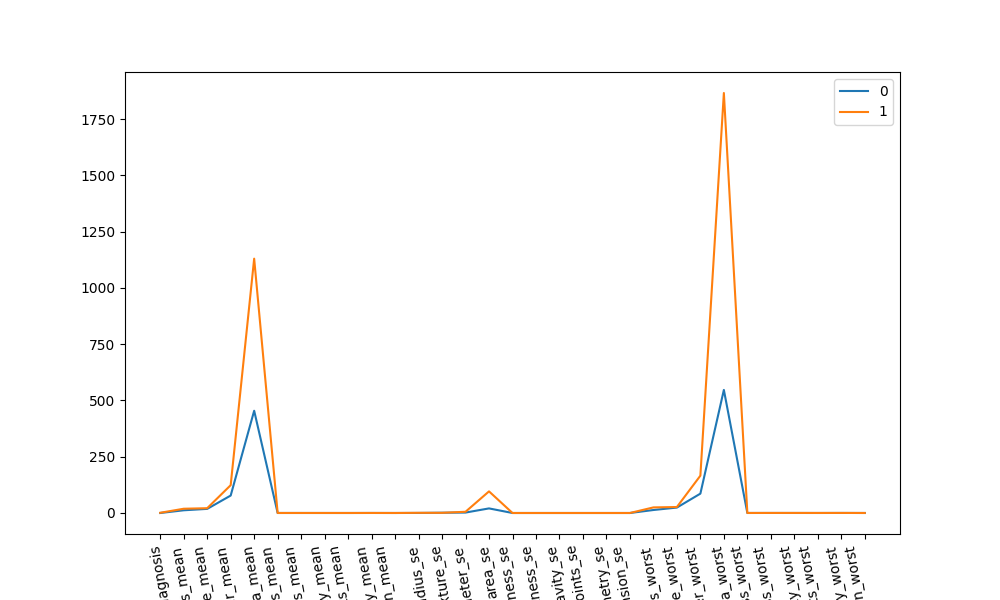

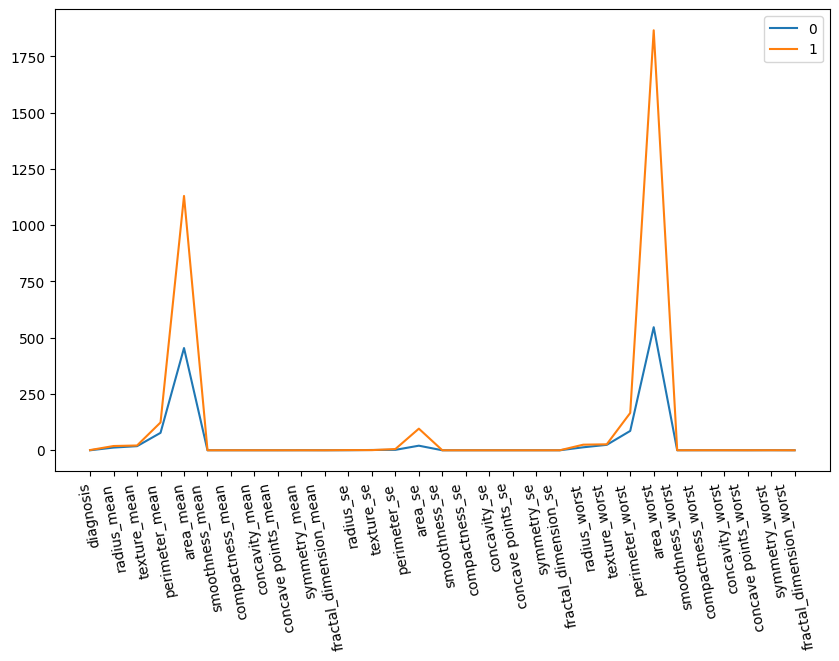

In [15]:
# 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(predicted_zeros)
plt.plot(predicted_ones.iloc[0])
plt.legend(['0', '1'])
plt.xticks(rotation=100)
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# Base64로 인코딩
image_breast2 = base64.b64encode(buffer.getvalue()).decode('utf-8')
image_breast2 = "data:image/png;base64," + image_breast2
print(f"Image Variable: {image_breast2}")
plt.show()

In [16]:
predicted_one = predicted_ones.mean()

Image Variable: 

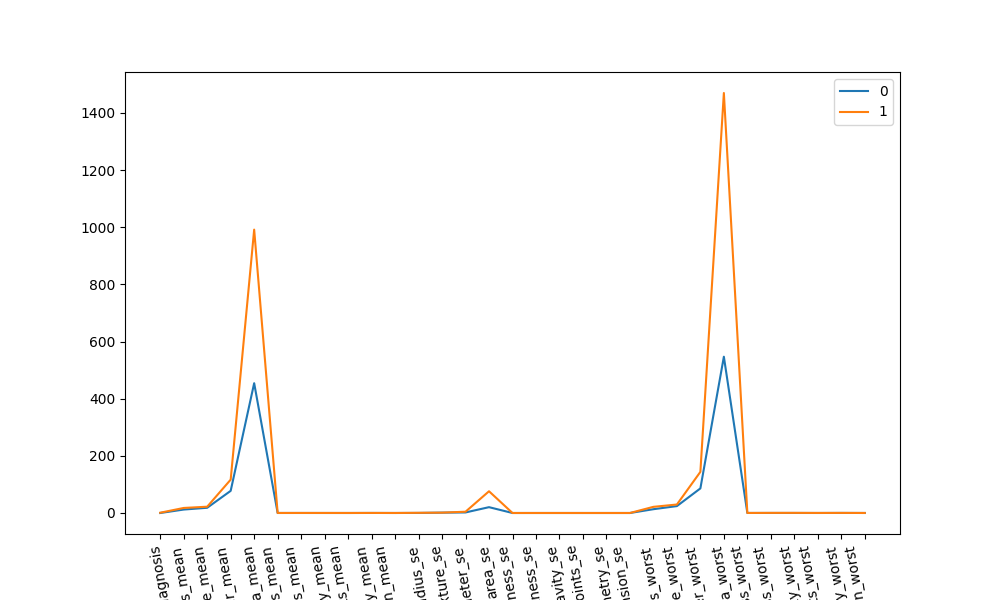

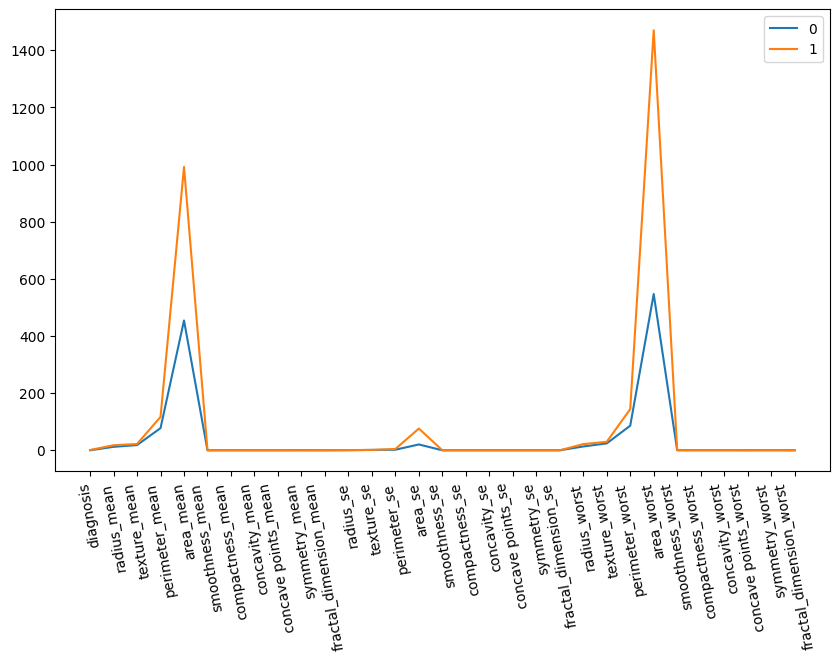

In [17]:
# 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(predicted_zeros)
plt.plot(predicted_one)
plt.legend(['0', '1'])
plt.xticks(rotation=100)
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# Base64로 인코딩
image_breast3 = base64.b64encode(buffer.getvalue()).decode('utf-8')
image_breast3 = "data:image/png;base64," + image_breast3
print(f"Image Variable: {image_breast3}")
plt.show()

In [18]:
brain_data = pd.read_csv('/content/drive/MyDrive/brain_stroke.csv')

In [19]:
object_cols = ['gender', 'ever_married','hypertension', 'heart_disease', 'Residence_type','work_type','smoking_status']

In [20]:
cat_cols_object = brain_data.select_dtypes(include ='object' or 'int64').keys()

In [21]:
# 원핫 인코딩 으로 텍스트 데이터 처리
onehot_encoder = OneHotEncoder(sparse=False)
df_encoded = pd.DataFrame(
    onehot_encoder.fit_transform(brain_data[cat_cols_object]),
    columns = onehot_encoder.get_feature_names_out(cat_cols_object)
)
df_encoded = pd.concat(
    [brain_data.drop(columns = cat_cols_object), df_encoded],
    axis = 1
)
df_encoded.head()
y = brain_data[['stroke']]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [162]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, random_state=42, test_size=0.25)

In [163]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test= standard_scaler.fit_transform(X_test)

In [164]:
cat_cols_object = brain_data.select_dtypes(include ='object' or 'int64').keys()

Image Variable: 

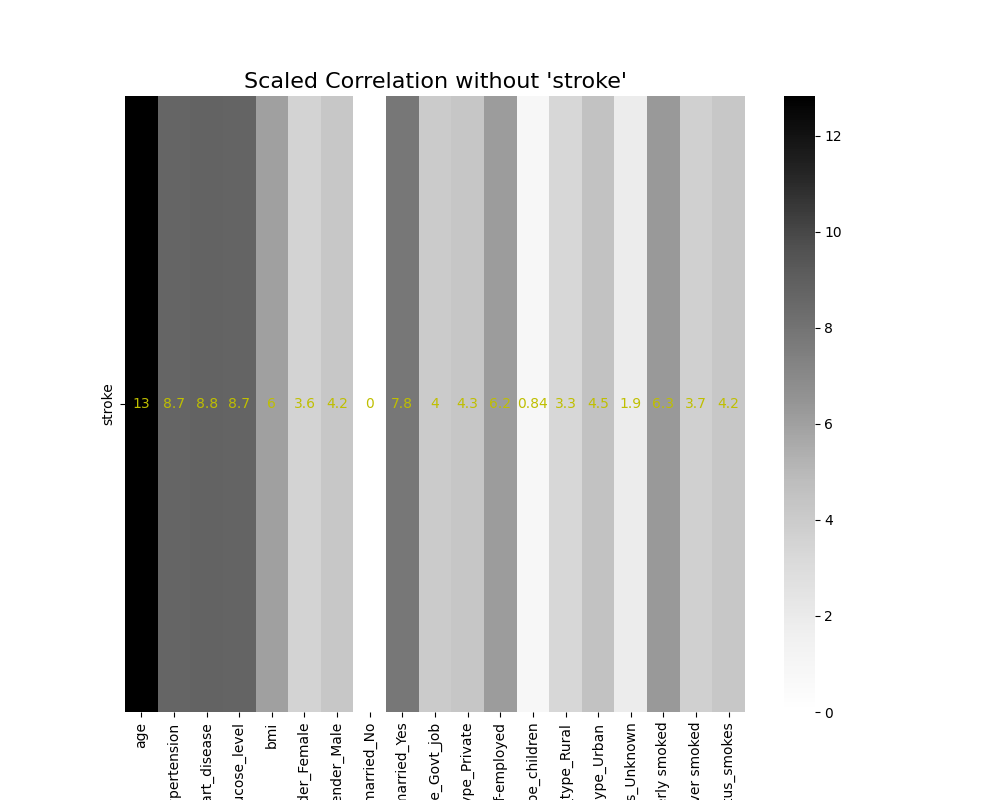

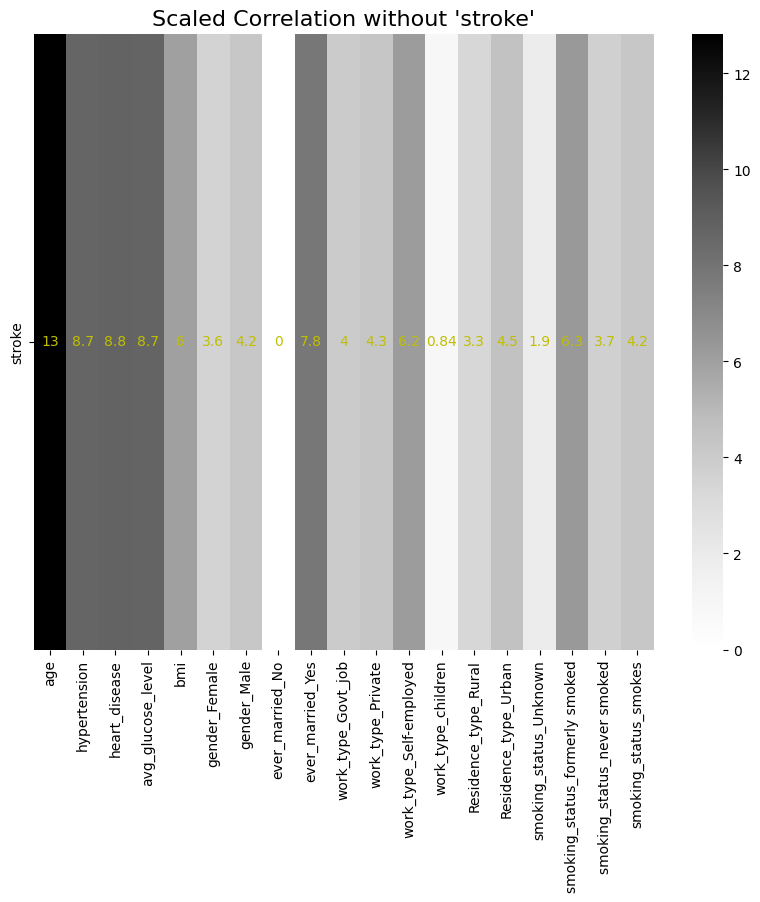

In [165]:
# 특성 열 선택
features = df_encoded
out = y
# Min-Max 스케일링 적용
scaler = standard_scaler
scaled_data = scaler.fit_transform(df_encoded)
# 스케일링된 데이터로 DataFrame 생성
scaled_df = pd.DataFrame(scaled_data, columns=df_encoded.columns)
scaled_df['stroke'] = out
# 상관관계 계산
correlation_matrix = scaled_df.corr()
# 'output' 열에 대한 상관관계 추출 (x에서 제외)
output_correlation = correlation_matrix.drop('stroke')['stroke']
# 상관관계 값을 0~1로 스케일링
scaled_output_correlation = (output_correlation - output_correlation.min()) / (output_correlation.max() - output_correlation.min())
# 합이 100이 되도록 조정
scaled_output_correlation = (scaled_output_correlation / scaled_output_correlation.sum()) * 100
# 상관관계 시각화
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data=scaled_output_correlation.to_frame().T, annot=True, annot_kws=dict(color='y', fontsize=10), cmap='Greys')
plt.title("Scaled Correlation without 'stroke'", fontsize=16)
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
# Base64로 인코딩
image_brain1 = base64.b64encode(buffer.getvalue()).decode('utf-8')
image_brain1 = "data:image/png;base64," + image_brain1
print(f"Image Variable: {image_brain1}")
plt.show()

In [166]:
# 로지시틱 회귀 모델
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)

predicted_zeros = X_test[y_pred == 0]  # 0으로 예측한 데이터
predicted_ones = X_test[y_pred == 1]  # 1으로 예측한 데이터
model.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [167]:
# 테이블 열 저장
column_names = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']
predicted_zeros = pd.DataFrame(predicted_zeros, columns=column_names)

In [168]:
predicted_ones = pd.DataFrame(predicted_ones, columns=column_names)

Image Variable: 

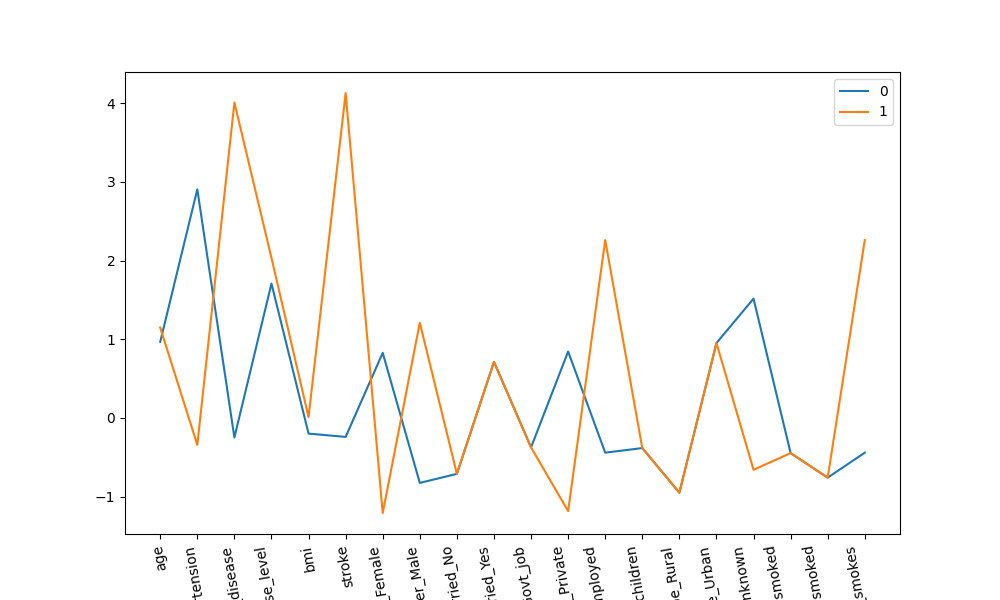

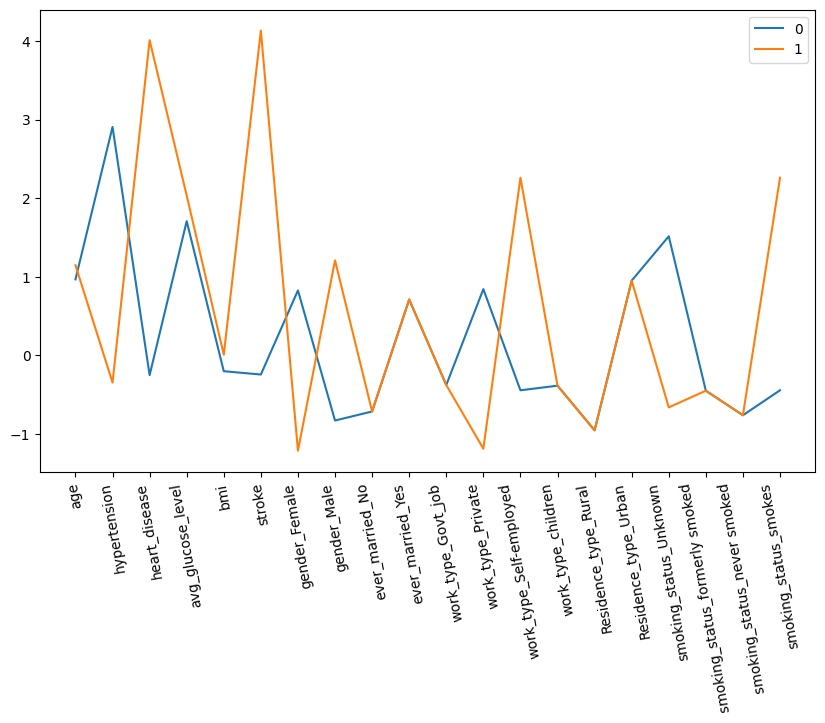

In [169]:
# 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(predicted_zeros.iloc[0])
plt.plot(predicted_ones.iloc[0])
plt.legend(['0', '1'])
plt.xticks(rotation=100)
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
# Base64로 인코딩
image_brain2 = base64.b64encode(buffer.getvalue()).decode('utf-8')
image_brain2 = "data:image/png;base64," + image_brain2
print(f"Image Variable: {image_brain2}")
plt.show()

In [170]:
predicted_zeros = predicted_zeros.mean()
predicted_ones = predicted_ones.mean()

Image Variable: 

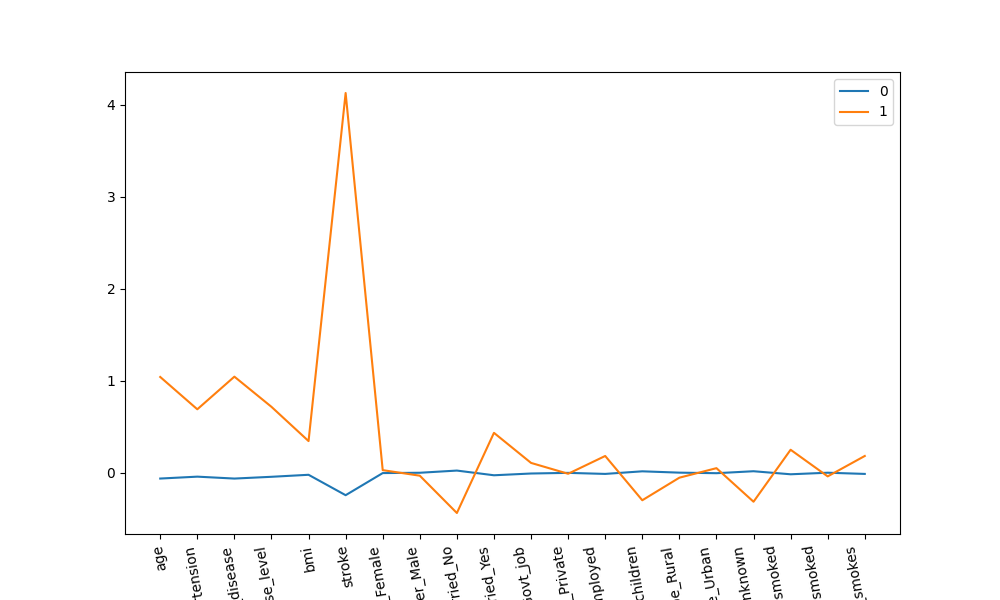

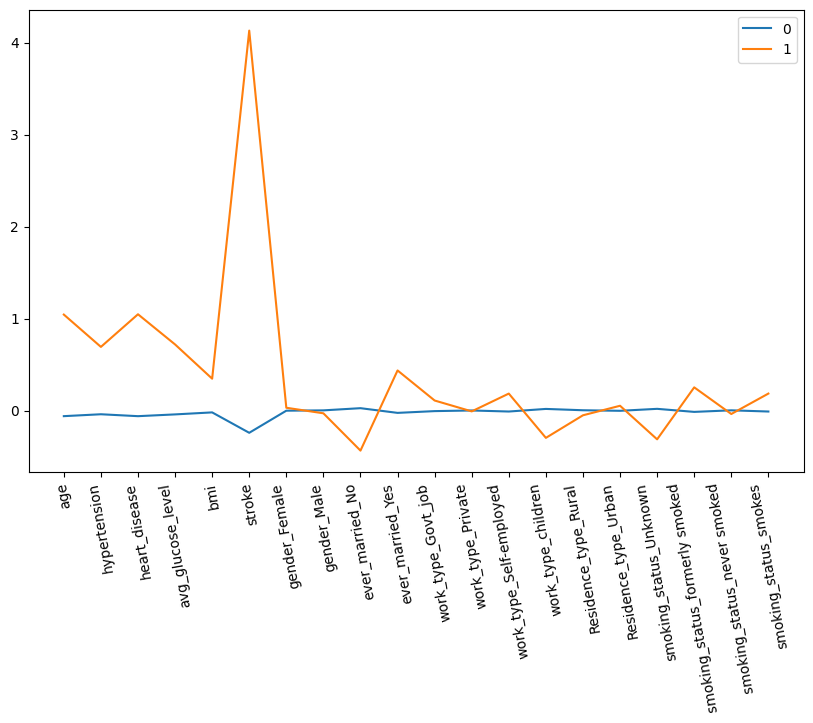

In [171]:
# 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(predicted_zeros)
plt.plot(predicted_ones)
plt.legend(['0', '1'])
plt.xticks(rotation=100)
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
# Base64로 인코딩
image_brain3 = base64.b64encode(buffer.getvalue()).decode('utf-8')
image_brain3 = "data:image/png;base64," + image_brain3
print(f"Image Variable: {image_brain3}")
plt.show()

In [172]:
heart_data = pd.read_csv('/content/drive/MyDrive/heart.csv')

Image Variable: 

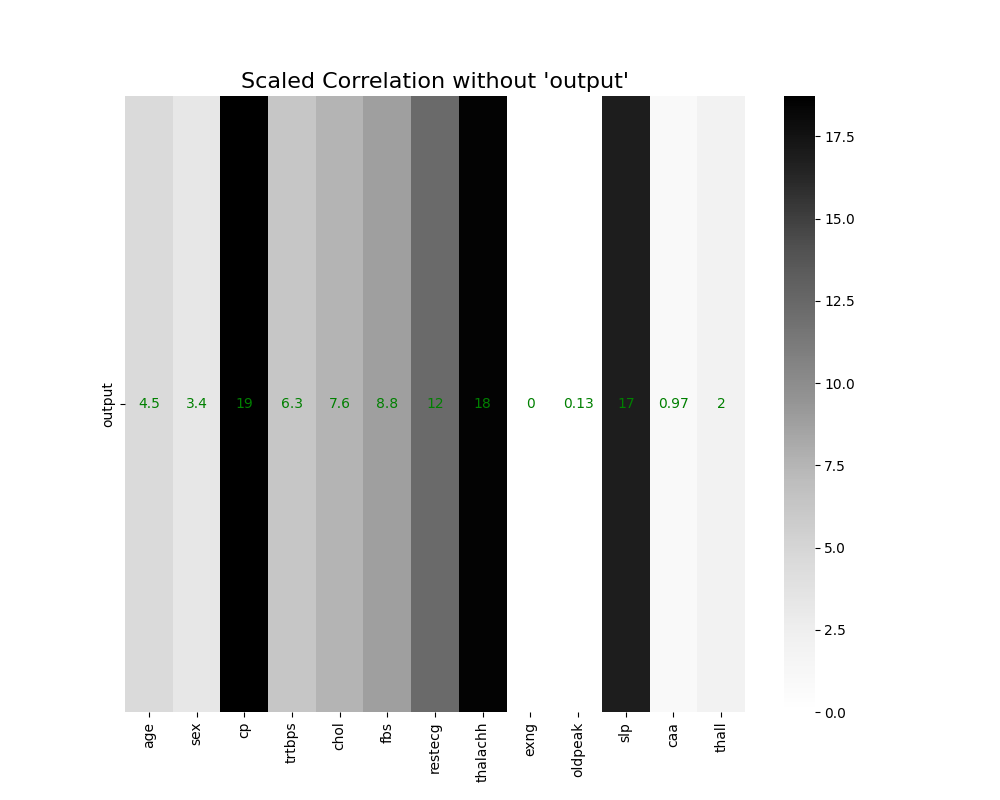

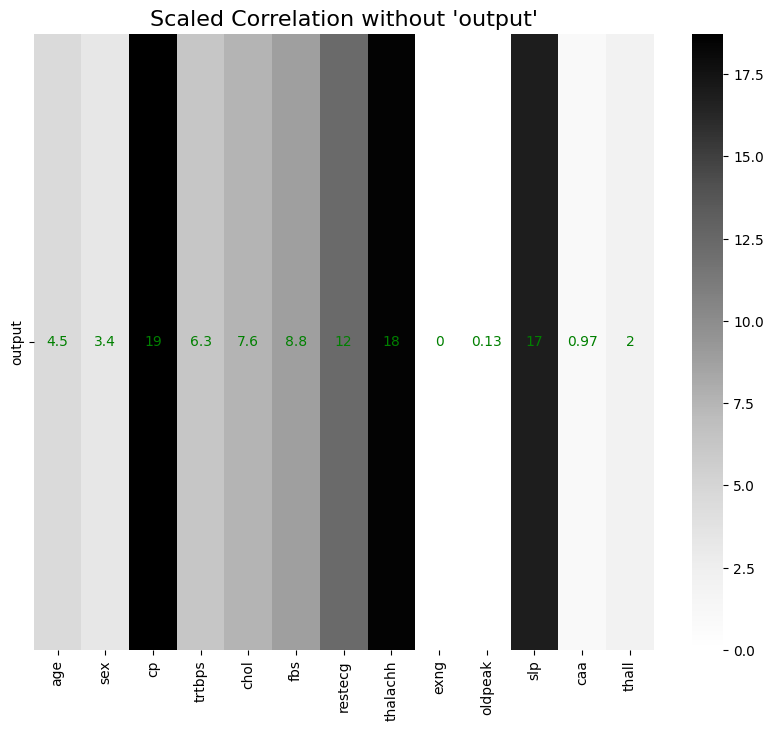

In [173]:
features = heart_data.drop('output', axis=1)
out = heart_data.drop(heart_data.columns[0:13], axis=1)
# 스케일링 작업
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_data, columns=features.columns)
scaled_df['output'] = out
# 상관관계 분석
correlation_matrix = scaled_df.corr()
output_correlation = correlation_matrix.drop('output')['output']
scaled_output_correlation = (output_correlation - output_correlation.min()) / (output_correlation.max() - output_correlation.min())
scaled_output_correlation = (scaled_output_correlation / scaled_output_correlation.sum()) * 100
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data=scaled_output_correlation.to_frame().T, annot=True, annot_kws=dict(color='g', fontsize=10), cmap='Greys')
plt.title("Scaled Correlation without 'output'", fontsize=16)

buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# Base64로 인코딩
image_heart1 = base64.b64encode(buffer.getvalue()).decode('utf-8')

# Base64 주소를 변수에 저장
image_heart1 = "data:image/png;base64," + image_heart1
print(f"Image Variable: {image_heart1}")
plt.show()

In [174]:
# 테이블 열 지정
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall' ]
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

In [175]:
data = pd.get_dummies(heart_data, columns = cat_cols, drop_first = True)
X = data.drop(['output'],axis=1)
y = data[['output']]
scaler = RobustScaler()
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")

The first 5 rows of X are


In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [177]:
# 로지스틱 회귀 모델 정의
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)
print(accuracy_score(y_test, y_pred))
predicted_zeros = X_test[y_pred == 0]
predicted_ones = X_test[y_pred == 1]

0.9016393442622951


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [178]:
predicted_zeros = predicted_zeros.mean()

Image Variable: 

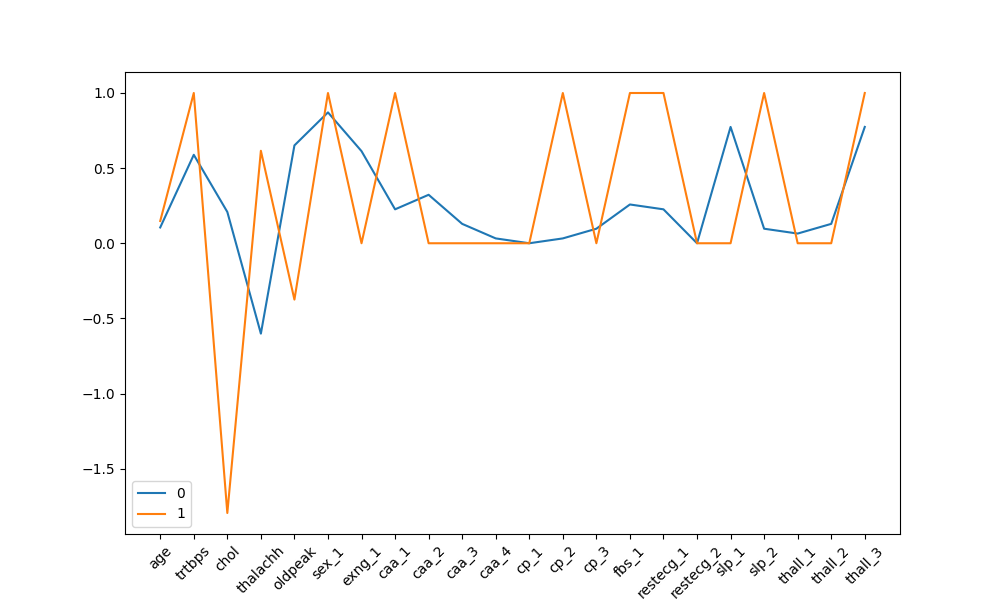

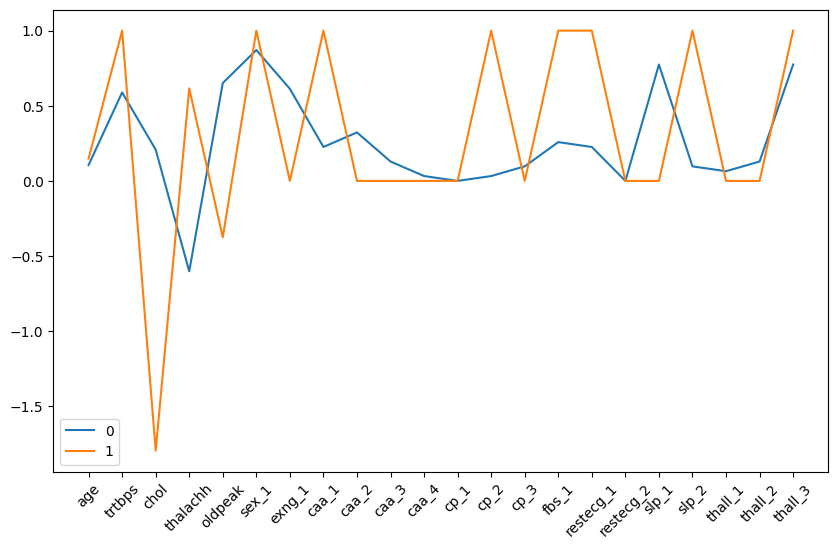

In [179]:
# 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(predicted_zeros)
plt.plot(predicted_ones.iloc[0])
plt.legend(['0', '1'])
plt.xticks(rotation=45)
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# Base64로 인코딩
image_heart2 = base64.b64encode(buffer.getvalue()).decode('utf-8')
image_heart2 = "data:image/png;base64," + image_heart2
print(f"Image Variable: {image_heart2}")
plt.show()

In [180]:
predicted_one = predicted_ones.mean()

Image Variable: 

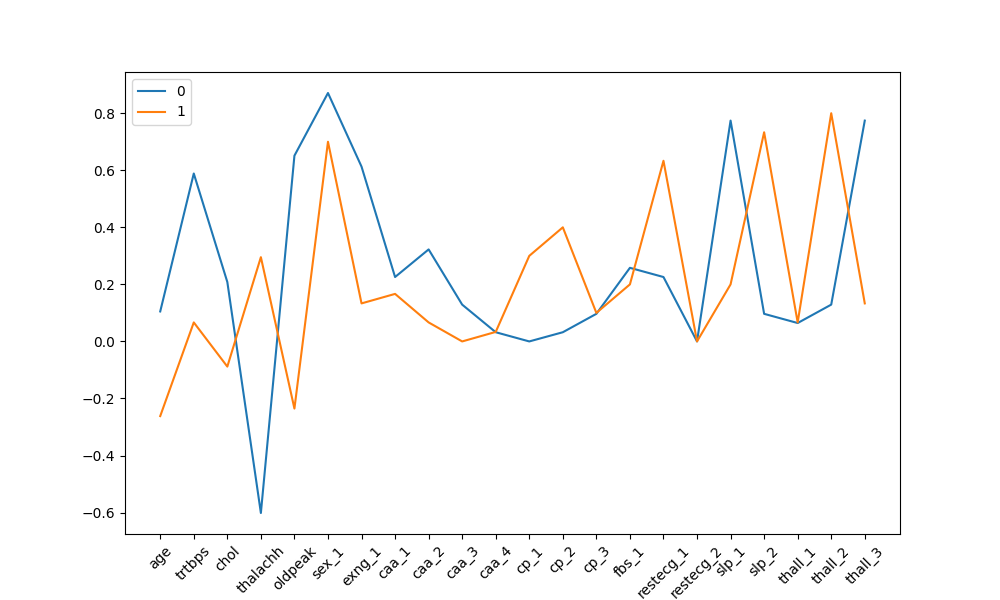

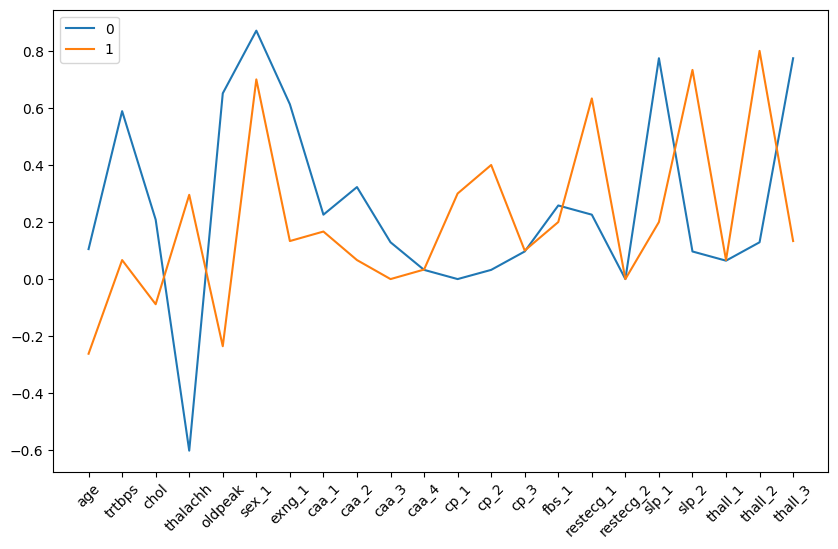

In [181]:
plt.figure(figsize=(10, 6))
plt.plot(predicted_zeros)
plt.plot(predicted_one)
plt.legend(['0', '1'])
plt.xticks(rotation=45)
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# Base64로 인코딩
image_heart3 = base64.b64encode(buffer.getvalue()).decode('utf-8')
image_heart3 = "data:image/png;base64," + image_heart3
print(f"Image Variable: {image_heart3}")
plt.show()

In [182]:
# 데이터 SQL에 업로드
import mysql.connector
from mysql.connector import errorcode
config = {
  'host':'(your_sql_server_name).mysql.database.azure.com',
  'user':'(your_sql_user)',
  'password':'(your_sql_passwd)',
  'database':'web_db'
}
try:
   conn = mysql.connector.connect(**config)
   print("Connection established")
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with the user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = conn.cursor()
cursor.execute(f"INSERT INTO breast_cancer VALUES(null,'{image_breast1}', '{image_breast2}', '{image_breast3}');")
print("Uploaded", cursor.rowcount, "row(s) of data.")
conn.commit()
cursor.close()
conn.close()
print("Done.")

Connection established
Uploaded 1 row(s) of data.
Done.


In [183]:
config = {
  'host':'(your_sql_server_name).mysql.database.azure.com',
  'user':'(your_sql_user)',
  'password':'(your_sql_passwd)',
  'database':'web_db'
}
try:
   conn = mysql.connector.connect(**config)
   print("Connection established")
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with the user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = conn.cursor()
cursor.execute(f"INSERT INTO heart_attack VALUES(null,'{image_heart1}', '{image_heart2}', '{image_heart3}');")
print("Uploaded", cursor.rowcount, "row(s) of data.")
conn.commit()
cursor.close()
conn.close()
print("Done.")

Connection established
Uploaded 1 row(s) of data.
Done.


In [185]:
config = {
  'host':'(your_sql_server_name).mysql.database.azure.com',
  'user':'(your_sql_user)',
  'password':'(your_sql_passwd)',
  'database':'web_db'
}
try:
   conn = mysql.connector.connect(**config)
   print("Connection established")
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with the user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = conn.cursor()
cursor.execute(f"INSERT INTO brain VALUES(null,'{image_brain1}', '{image_brain1}', '{image_brain1}');")
print("Uploaded", cursor.rowcount, "row(s) of data.")
conn.commit()
cursor.close()
conn.close()
print("Done.")

Connection established
Uploaded 1 row(s) of data.
Done.
